## Práctico entregable Aprendizaje No Supervisado
Utilizar la base de jugadores “female_players.csv” disponible en la página de Kaggle https://www.kaggle.com/datasets/stefanoleone992/fifa-23-complete-player-dataset . Consideren que en comparación con la base vista en clase, esta base no tiene los mismos jugadores (ahora mujeres 2023) y no tiene exactamente el mismo formato (a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde).

Con la nueva base, realizar el siguiente análisis. Notar que es más completo pero análogo al que realizamos con los datos FIFA2019 en el cursado de la materia. Realice comentarios en cada parte (verbose=True ;))

1- Análisis exploratorio inicial de la base.


2- Evaluación visual e intuitiva de a dos variables numéricas por vez. Sugerencia: hagan los scatterplots de las combinaciones de dos variables que tengan algún sentido para ustedes, porque todas las combinaciones de variables son muchas y no van a poder analizarlas como merecen.


3- Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?


4- Aplicación de clustering para encontrar grupos de jugadoras con habilidades equivalentes, por ejemplo, jugadoras que podrían intercambiarse en el caso de una lesión o cuando una jugadora está cansada. Para esto utilice como mínimo dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Justifiquen por qué eligen los diferentes hiper-parámetros que se puedan elegir según el método: número de clusters, medida de distancia, criterio de aglomeración… 


5- Análisis cualitativo de los clusters encontrados. ¿Qué hay en cada cluster? ¿Son efectivamente equivalentes las jugadoras de un cluster, es decir, podrían cumplir el mismo rol en un equipo? Si se trata de clusters heterogéneos, ¿por qué razón pueden haber sido agrupadas las jugadoras del cluster? ¿Qué motiva las diferencias en tamaño?


6- Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.

## 1- Carga de datos y Análisis exploratorio inicial de la base.

In [1]:
import numpy as np
import pandas as pd
import itertools
import warnings
import io

In [118]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.tools as tls
import plotly.figure_factory as ff
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import plotly.offline as pyo
from sklearn.cluster import KMeans,MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn import cluster
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn import (manifold, preprocessing, decomposition)
import time
from sklearn import cluster
import plotly.express as px

In [6]:
dtype_options = {'league_name': 'object',
                 'club_name': 'object',
                 'club_position': 'object',
                 'club_loaned_from': 'object',
                 'club_joined_date': 'object'}

df = pd.read_csv('female_players.csv', dtype=dtype_options)
df.head(5)

player_id                           player_url  fifa_version  fifa_update  \
0     227125       /player/227125/sam-kerr/230009            23            9   
1     227316  /player/227316/wendie-renard/230009            23            9   
2     226301    /player/226301/alex-morgan/230009            23            9   
3     227310  /player/227310/ada-hegerberg/230009            23            9   
4     227246    /player/227246/lucy-bronze/230009            23            9   

  fifa_update_date    short_name                      long_name  \
0       2023-01-13       S. Kerr              Samantha May Kerr   
1       2023-01-13     W. Renard      Wéndèleine Thérèse Renard   
2       2023-01-13     A. Morgan      Alexandra Morgan Carrasco   
3       2023-01-13  A. Hegerberg  Ada Martine Stolsmo Hegerberg   
4       2023-01-13     L. Bronze     Lucia Roberta Tough Bronze   

  player_positions  overall  potential  ...   cdm   rdm   rwb    lb   lcb  \
0               ST       91         91  ...  62+3  62+3  64+3  61+3  58+3   
1               CB       91         91  ...  87+3  87+3  80+3  82+3    91   
2               ST       90         90  ...  67+3  67+3  69+3  66+3  60+3   
3               ST       90         91  ...  61+3  61+3  63+3  60+3  56+3   
4               RB       89         89  ...  86+3  86+3  87+2  87+2  87+2   

     cb   rcb    rb    gk                                    player_face_url  
0  58+3  58+3  61+3  20+3  https://cdn.sofifa.net/players/227/125/23_120.png  
1    91    91  82+3  21+3  https://cdn.sofifa.net/players/227/316/23_120.png  
2  60+3  60+3  66+3  19+3  https://cdn.sofifa.net/players/226/301/23_120.png  
3  56+3  56+3  60+3  20+3  https://cdn.sofifa.net/players/227/310/23_120.png  
4  87+2  87+2  87+2  20+3  https://cdn.sofifa.net/players/227/246/23_120.png  

[5 rows x 110 columns]

In [7]:
df.columns.values

array(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'fifa_update_date', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob',
       'height_cm', 'weight_kg', 'league_id', 'league_name',
       'league_level', 'club_team_id', 'club_name', 'club_position',
       'club_jersey_number', 'club_loaned_from', 'club_joined_date',
       'club_contract_valid_until_year', 'nationality_id',
       'nationality_name', 'nation_team_id', 'nation_position',
       'nation_jersey_number', 'preferred_foot', 'weak_foot',
       'skill_moves', 'international_reputation', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'player_traits', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
     

In [8]:
df = df[df['fifa_version'] == 23]

### Exploracion de los datos


<Axes: >

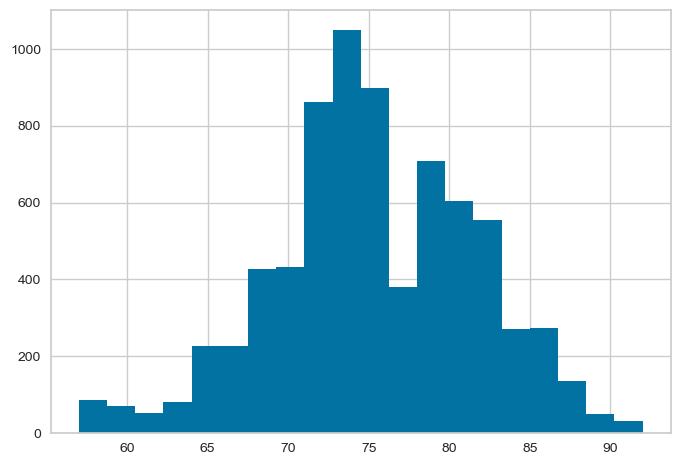

In [9]:
#histograma de variable overall 
df['overall'].hist(bins = 20)

In [10]:
#10 jugadoras con mayor overall
mejores_jugadoras_por_posicion =df.iloc[df.groupby(df['club_position'])['overall'].idxmax()][['club_position','short_name','overall']]
mejores_jugadoras_por_posicion.sort_values('overall', ascending=False)[:10]

club_position       short_name  overall
2491           SUB  Alexia Putellas       92
1              LCB        W. Renard       91
0               ST          S. Kerr       91
833            RES     A. Hegerberg       91
2497            RB        L. Bronze       90
2496           CAM        C. Hansen       90
2499            CM       V. Miedema       89
2501            GK        C. Endler       89
1667            RW          B. Mead       89
4156           RAM          B. Mead       88

In [11]:
#cantidad de jugadoras por posición
pd.DataFrame(df.club_position.value_counts().sort_values(ascending=False)[:10])

club_position
SUB           2328
GK             220
RCB            220
LCB            220
ST             168
LCM            166
RCM            166
RB             148
LB             144
RES            122

Las posiciones 'SUB' y 'RES' se corresponden a suplentes y reservas.

In [12]:
#10 clubes con mayor overall promedio  
club_avg_overall=df.groupby("club_name")["overall"].mean().round(0).reset_index().sort_values("overall",ascending=False)
club_avg_overall.head(10)

club_name  overall
8         England W     90.0
33  United States W     84.0
12        Germany W     84.0
29          Spain W     83.0
31         Sweden W     82.0
0         Arsenal W     81.0
11         France W     81.0
17           Lyon W     81.0
22    Netherlands W     80.0
4          Canada W     80.0

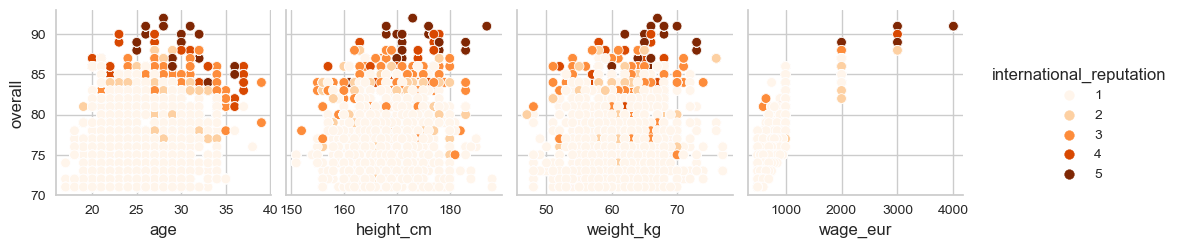

In [13]:
sns.pairplot(
    df[df.overall > 70],
    x_vars=['age', 'height_cm',	'weight_kg', 'wage_eur'],
    y_vars=["overall"],
    hue= 'international_reputation',
    palette='Oranges')

Las caracteristicas de la jugadora relacionada a la variable overall. 

    . La edad de las jugadoras con mayor overall ronda a edades cercanas a los 30 años. 
    . Como se esperaba las jugadoras con mejor overall tienen mayores ganancias.
    . Tambien se puede ver en todos los casos que a mayor overall mayor es la reputacion internacional del jugador.

### Limpieza y Curacion de datos

In [14]:
df['overall'].quantile(0.75)

80.0

In [15]:
#Se seleccionan aquellas jugadoras que poseen un overall superior a 70, es decir aquellas jugadoras que superan el tercer cuantil
df_f =df[df.overall > 70]
df_f.shape

(5818, 110)

In [16]:
df_f.club_position.value_counts().sort_values(ascending=False)

SUB    1429
GK      213
LCB     196
RCB     192
LCM     164
ST      162
RCM     162
LB      140
RB      130
LW      102
RM       99
LM       98
RW       96
CB       73
CAM      70
RES      50
LDM      49
LS       48
RDM      47
RS       47
CM       43
CDM      40
RAM      17
LAM      16
RWB      12
LWB      11
CF        5
Name: club_position, dtype: int64

In [17]:
#Se seleccionan las skills 
skills_ratings = ['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']
print(len(skills_ratings))

33


In [18]:
#dataset que contiene solo las características futbolísticas de las jugadoras
df_s=df_f[skills_ratings]
df_s.head(5)

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  70                   93                          91   
1                  51                   70                          96   
2                  71                   95                          86   
3                  71                   94                          93   
4                  87                   73                          82   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       78                 92               90           76   
1                       84                 55               69           65   
2                       91                 87               87           68   
3                       84                 90               91           79   
4                       85                 66               79           88   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  ...  \
0                 68                  64                  92  ...   
1                 58                  87                  85  ...   
2                 70                  82                  93  ...   
3                 75                  72                  91  ...   
4                 81                  80                  85  ...   

   mentality_vision  mentality_penalties  mentality_composure  \
0                79                   75                 92.0   
1                59                   75                 84.0   
2                75                   88                 92.0   
3                76                   86                 86.0   
4                73                   62                 86.0   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         39                        30                   7   
1                         94                        91                   7   
2                         43                        39                  11   
3                         33                        30                  15   
4                         91                        89                  10   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    12                    8                       16   
1                    14                   17                       11   
2                    11                   10                       10   
3                     7                   12                       10   
4                    14                   16                        8   

   goalkeeping_reflexes  
0                    13  
1                    15  
2                    11  
3                    14  
4                    15  

[5 rows x 33 columns]

In [19]:
df_f.club_position.unique()

array(['ST', 'LCB', nan, 'RES', 'SUB', 'CM', 'GK', 'LCM', 'LM', 'RB',
       'RCM', 'RCB', 'LW', 'LB', 'CB', 'RW', 'CAM', 'RM', 'LDM', 'RDM',
       'CDM', 'RAM', 'LAM', 'LS', 'RS', 'RWB', 'CF', 'LWB'], dtype=object)

Se crea una variable que agrupa las posiciones de las jugadoras en cuatro posiciones generales: 

    - Arqueras
    - Defensoras
    - MediocampistasD
    - Delanteras

In [21]:
new_position = {
      'RCB':'Defensores', 'CB':'Defensores', 'LCB':'Defensores', 'LB':'Defensores', 'RB':'Defensores', 'RWB':'Defensores', 'LWB':'Defensores', 
      'CM':'Mediocampistas', 'CDM':'Mediocampistas', 'CAM':'Mediocampistas', 'RCM':'Mediocampistas', 'RDM':'Mediocampistas', 'LCM':'Mediocampistas', 'LDM':'Mediocampistas', 'LAM':'Mediocampistas', 'RAM':'Mediocampistas',  'RM':'Mediocampistas', 'LM':'Mediocampistas',
      'ST':'Delanteros', 'RF':'Delanteros', 'LW':'Delanteros', 'RS':'Delanteros', 'RW':'Delanteros', 'CF':'Delanteros', 'LS':'Delanteros', 'LF':'Delanteros', 
      'GK':'Arqueros'}

position = df_f.club_position.replace(new_position)
df_f['new_position'] = position
df_f.head(2)

player_id                           player_url  fifa_version  fifa_update  \
0     227125       /player/227125/sam-kerr/230009            23            9   
1     227316  /player/227316/wendie-renard/230009            23            9   

  fifa_update_date short_name                  long_name player_positions  \
0       2023-01-13    S. Kerr          Samantha May Kerr               ST   
1       2023-01-13  W. Renard  Wéndèleine Thérèse Renard               CB   

   overall  potential  ...   rdm   rwb    lb   lcb    cb   rcb    rb    gk  \
0       91         91  ...  62+3  64+3  61+3  58+3  58+3  58+3  61+3  20+3   
1       91         91  ...  87+3  80+3  82+3    91    91    91  82+3  21+3   

                                     player_face_url  new_position  
0  https://cdn.sofifa.net/players/227/125/23_120.png    Delanteros  
1  https://cdn.sofifa.net/players/227/316/23_120.png    Defensores  

[2 rows x 111 columns]

In [22]:
df_f.shape

(5818, 111)

## 2- Evaluación visual e intuitiva de a dos variables numéricas por vez. Sugerencia: hagan los scatterplots de las combinaciones de dos variables que tengan algún sentido para ustedes, porque todas las combinaciones de variables son muchas y no van a poder analizarlas como merecen.

#### Comparamos curva y precision tiro libre:
A mas curva, mas precision en los tiros libres.

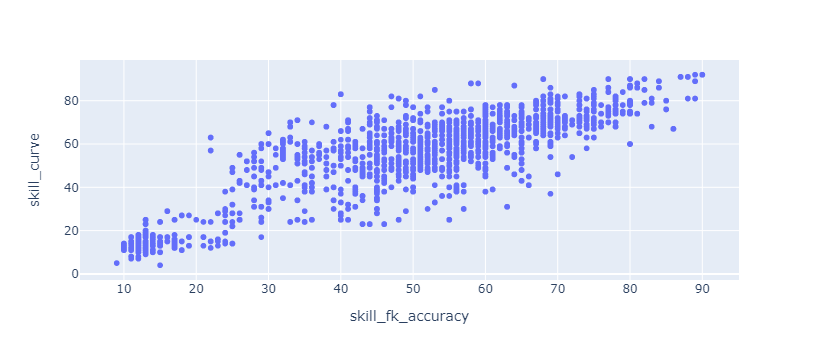

In [119]:
px.scatter(df, x = 'skill_fk_accuracy', y = 'skill_curve')

#### Peso y capacidad de gambeta:
Podemos ver que el grupo de los mas "pesados" suelen tener menos habilidad a la hora de gambetear. 

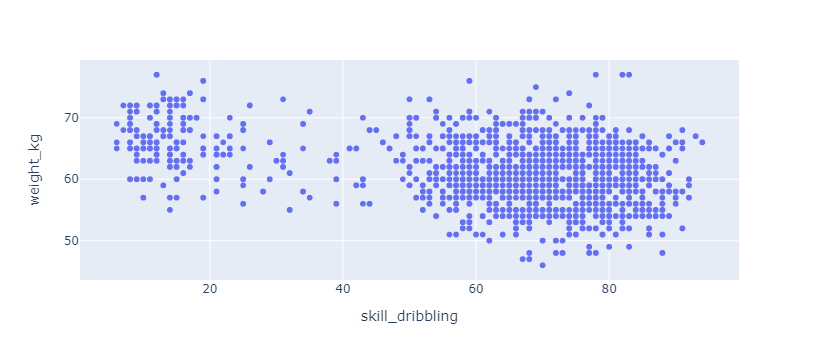

In [120]:
px.scatter(df, x = 'skill_dribbling', y = 'weight_kg')

#### Capacidad para mantener la calma y resistencia:
Vemos que los que tienen poca calma, suelen tener una menor capacidad de resistencia.

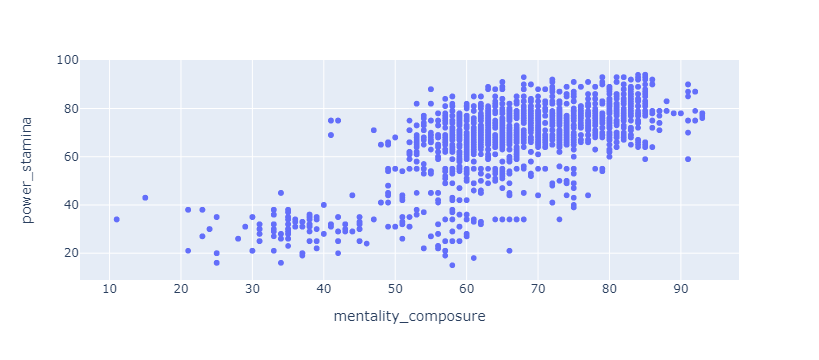

In [121]:
px.scatter(df, x = 'mentality_composure', y = 'power_stamina')

In [29]:
df_f['new_position'].unique()

array(['Delanteros', 'Defensores', nan, 'RES', 'SUB', 'Mediocampistas',
       'Arqueros'], dtype=object)

Se grafican las variables sin tener en cuenta la categoria 'SUB' y 'RES', 
Sin las filas que no contienen posicion de jugador, y eliminando los arqueros, observandose una mejor separacion de los datos,
se diferencia posiciones con colores.

In [30]:


df_position=df_f[(df_f.club_position!='SUB')&(df_f.club_position!='RES')&((-df_f.club_position.isna())&(df_f.club_position!='GK'))].copy()


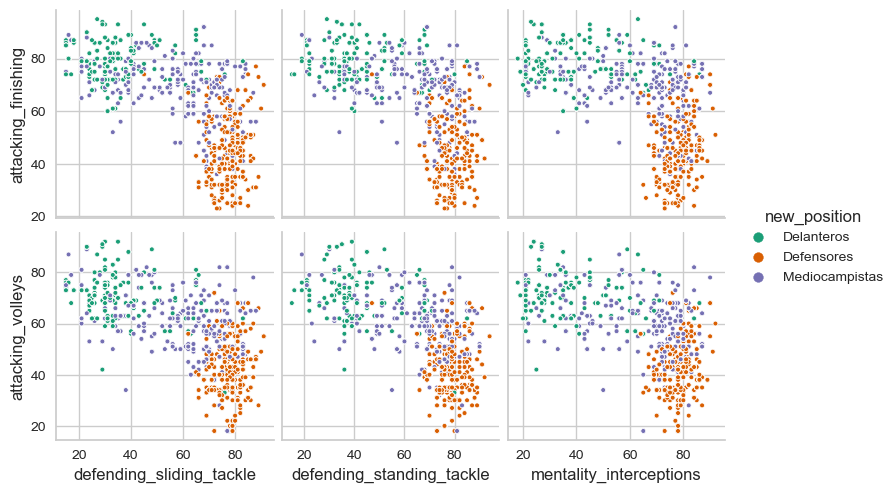

In [31]:
sns.pairplot(
    df_position,
    x_vars=['defending_sliding_tackle','defending_standing_tackle','mentality_interceptions'],
    y_vars=['attacking_finishing','attacking_volleys'],
    hue= 'new_position',
    palette='Dark2',
    markers= '.')

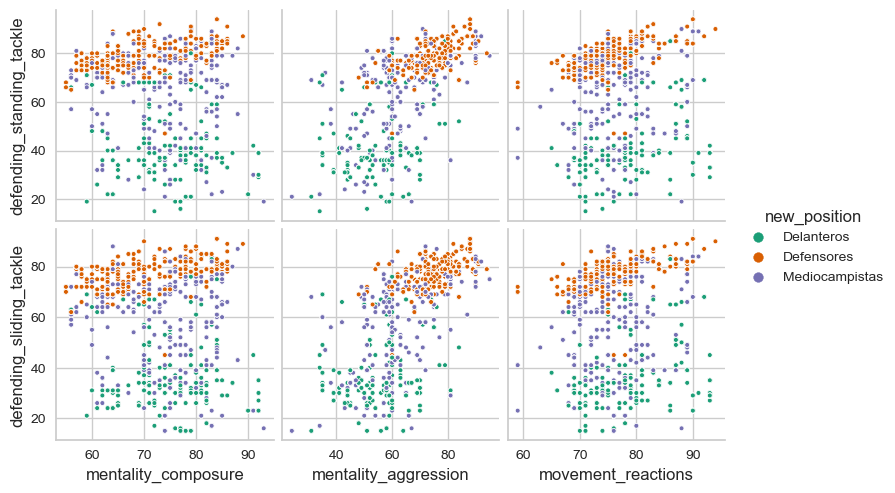

In [117]:
sns.pairplot(
    df_position,
    x_vars=['mentality_composure','mentality_aggression', 'movement_reactions'],
    y_vars=['defending_standing_tackle','defending_sliding_tackle'],
    hue= 'new_position',
    palette='Dark2',
    markers= '.')

Para los defensores, se observa una relación lineal ascendente entre la "compostura mental" y la "reacción de movimiento" con las habilidades de tackle defensivo, incluyendo "standing tackle" y "sliding tackle". Esto sugiere que aquellos defensores que poseen una mayor compostura mental y una reacción de movimiento más rápida tienden a destacarse en los tackles defensivos, demostrando su habilidad para tomar decisiones rápidas y efectivas en situaciones cruciales en defensa. En contraste, para otras posiciones, no es evidente una relación similar entre estas habilidades mentales y las habilidades de tackles defensivos. Esto resalta la relevancia específica de la compostura mental y la reacción de movimiento para los defensores, ya que mejoran su capacidad de ejecutar exitosamente tácticas defensivas y responder ágilmente a los cambios en el campo.

Además, en lo que respecta a la "agresión mental" y su relación con los tackles defensivos, los defensores exhiben niveles significativamente más altos de esta habilidad en comparación con delanteros y mediocampistas. Esta mayor agresión podría asociarse con la naturaleza defensiva del juego, ya que los defensores suelen estar más involucrados en enfrentamientos físicos y desafíos defensivos. La relación pronunciada y ascendente entre "agresión mental" y tackles defensivos para los defensores sugiere que la agresión podría contribuir a su capacidad para recuperar el balón en situaciones defensivas.

## 4- Aplicación de clustering para encontrar grupos de jugadoras con habilidades equivalentes, por ejemplo, jugadoras que podrían intercambiarse en el caso de una lesión o cuando una jugadora está cansada. Para esto utilice como mínimo dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Justifiquen por qué eligen los diferentes hiper-parámetros que se puedan elegir según el método: número de clusters, medida de distancia, criterio de aglomeración… 

###  Kmeans

Se realiza clustering sin tener en cuenta las categorias 'SUB' y 'RES' y sin las filas que no contienen posicion de jugador, ya que se observaba mejor diferenciación de las posiciones sin ellas.

In [32]:

df_position['new_position'].value_counts()

Mediocampistas    805
Defensores        754
Delanteros        460
Name: new_position, dtype: int64

In [33]:
#Se eliminan las skills de los arqueros
skills_ratings_sin_arqueros = [ 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_standing_tackle',
       'defending_sliding_tackle']

In [34]:
df_position.shape

(2019, 111)

In [35]:
#Dataset con solo las variables numericas
df_n=df_position[skills_ratings_sin_arqueros].copy()
df_n.shape

(2019, 28)

Se emplea el método del codo para determinar el número de clusters más adecuado 

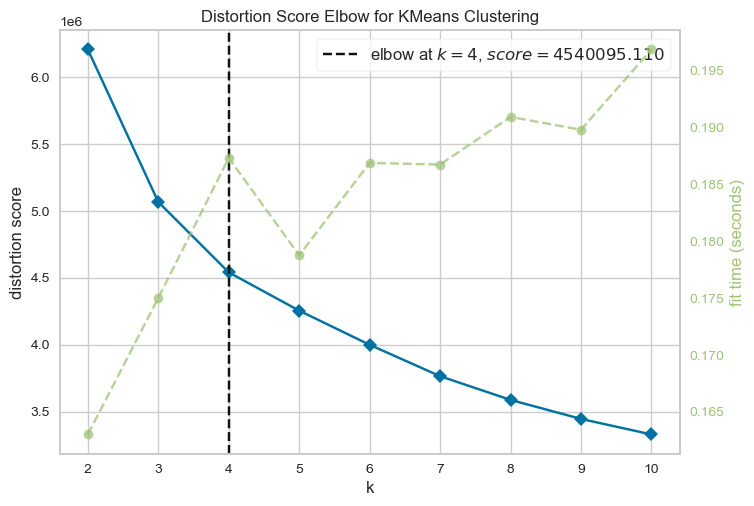

In [39]:
kmeans_model = KMeans(random_state=0,  n_init=10)

# k = cantidad de posiciones distintas en la cancha.
visualizer = KElbowVisualizer(kmeans_model)
visualizer.fit(df_n)
visualizer.show()
plt.show()

In [41]:
# Se determina el cuatro como el número más adecuado de clusters
n_clust = 4

km = KMeans(n_clusters=n_clust, random_state=1,  n_init=10)
km.fit(df_n) 

clusters = km.labels_

In [42]:
kmean_clusters_1 = go.Scatter(x= df_n['defending_sliding_tackle'], y=df_n['attacking_finishing'],
                           mode='markers',
                        text=df_position.loc[:,'new_position'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(float), 
                                colorscale='cividis',
                                showscale=False))


layout_1 = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title='defending_sliding_tackle'),
                yaxis=dict(title='attacking_finishing'),
                autosize=False, width=1000,height=650)

fig1 = go.Figure(data=kmean_clusters_1, layout=layout_1)

pyo.plot(fig1, filename='cluster_plot.html')

'cluster_plot.html'

#### Análisis de clusters

In [43]:
df_clusters=df_position.copy()
df_clusters['kmeans'] = km.labels_ 
df_clusters.kmeans.value_counts()

2    608
0    556
3    458
1    397
Name: kmeans, dtype: int64

<Axes: ylabel='kmeans'>

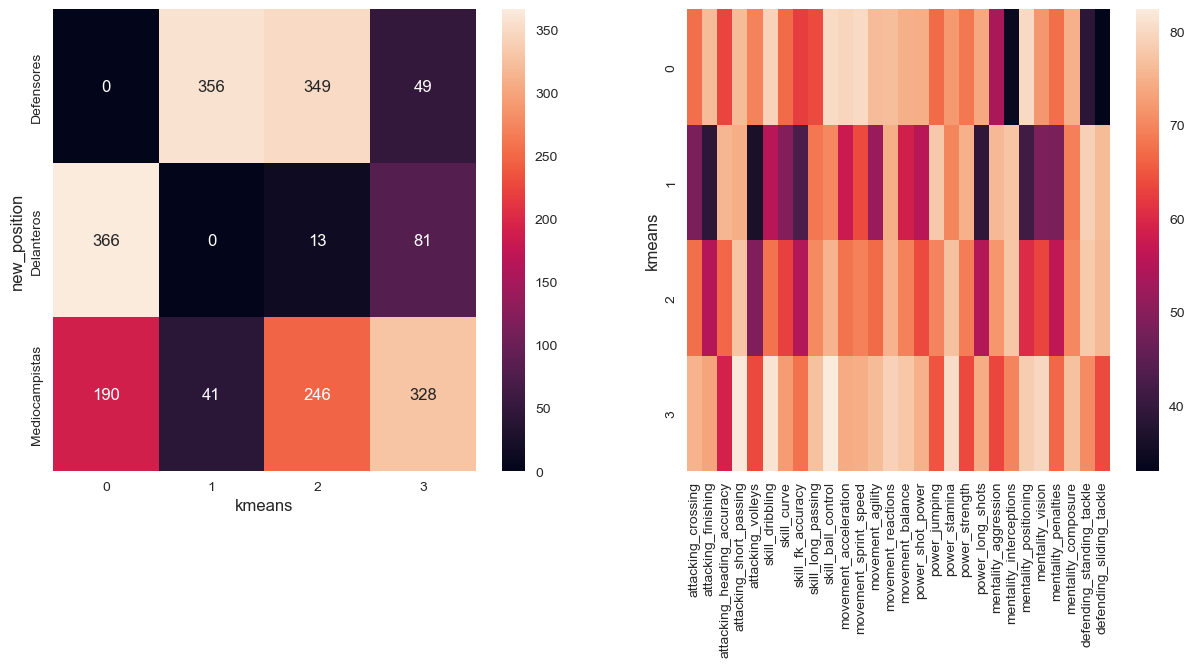

In [44]:
#se grafica las posiciones y se diferencian por clusters y se comparan clusters con todas las dimensiones de atributos
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
#ax = plt.subplots(nrows=1,ncols=2)
sns.heatmap(pd.crosstab(df_clusters['new_position'],df_clusters['kmeans']),annot=True,fmt='g',ax=axes[0])
sns.heatmap(df_clusters.groupby(['kmeans'])[skills_ratings_sin_arqueros].mean(),ax=axes[1])

Observando las visualizaciones podemos ver las agrupaciones realizadas por kmeans, dos grupos con menores atributos de defensa, compuesto por mediocampistas y delanteros, grupos con mas habilidades de defensa y menos de ataque, un grupo de delanteros con mayor velocidad y aceleracion y otro grupo con mayor punteria, definicion, entre otras.

<Axes: xlabel='kmeans', ylabel='new_position'>

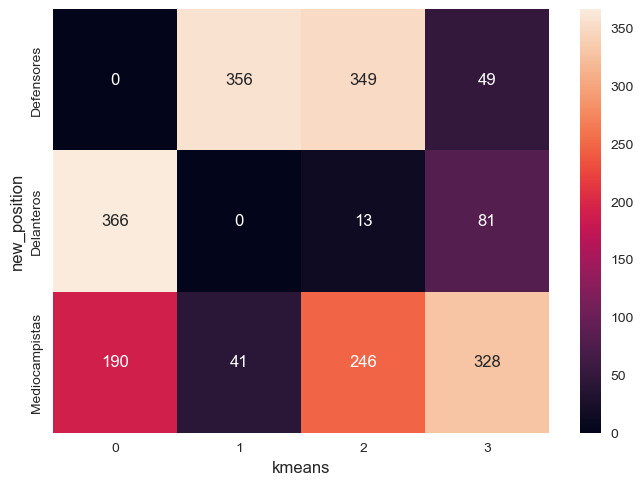

In [45]:
sns.heatmap(pd.crosstab(df_clusters['new_position'],df_clusters['kmeans']),annot=True,fmt='g')

Se puede observar que hay una cierta concordancia en la división de clusters y las posiciones, ya que los cluster 0, 2, y 4 estan conformados principalmente por defensores y los clusters 1 y 3 estan conformados principalmente por delanteros. La posición de mediocampista se entrecruza con los clusters correspondientes a delanteros, y defensores. Esto puede deberse a que puede que haya mediocampistas con más habilidades de delantero, y mediocampistas con mas habilidades de defensor. 

### MEAN SHIFT

In [46]:
estimate_bandwidth(df_n)

76.48566385107118

Con el bandwith estimado Mean Shift encuentra un solo agrupamiento, por lo tanto lo disminuimos.

In [48]:
ms = MeanShift(bandwidth=60) 

ms.fit(df_n)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 3


In [49]:
MeanShift_clusters = go.Scatter(x= df_n['defending_sliding_tackle'], y=df_n['attacking_finishing'],
                           mode='markers',
                        text=df_position.loc[:,'new_position'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(float), 
                                colorscale='geyser',
                                showscale=False)
                           )


layout_3= go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title='defending_sliding_tackle'),
                yaxis=dict(title='mentality_interceptions'),
                autosize=False, width=1000,height=650)

fig3 = go.Figure(data=MeanShift_clusters, layout=layout_3)
pyo.plot(fig3, filename='cluster_plot.html')

'cluster_plot.html'

#### Análisis de clusters

In [50]:
df_clusters['MeanS'] =  ms.labels_ 
df_clusters.MeanS.value_counts()

0    1081
1     902
2      36
Name: MeanS, dtype: int64

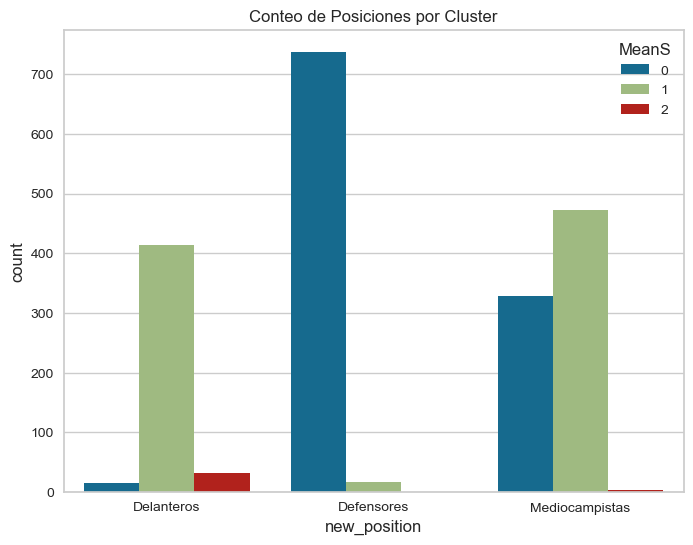

In [51]:
fig = plt.figure(figsize=(8, 6))

sns.countplot(x='new_position', hue='MeanS', data=df_clusters)

plt.title('Conteo de Posiciones por Cluster')
plt.show()

<Axes: xlabel='MeanS', ylabel='new_position'>

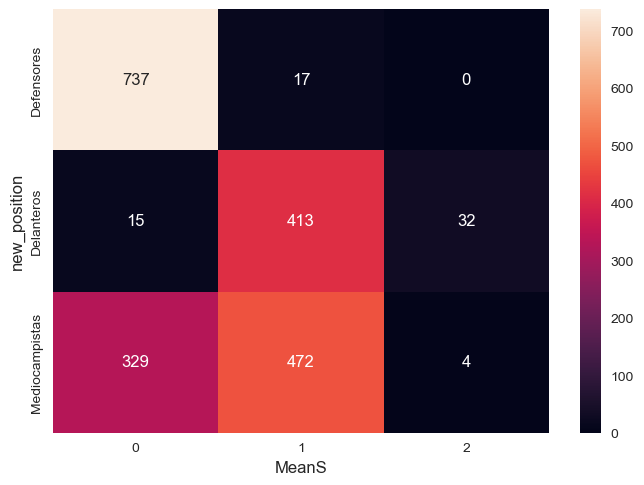

In [52]:
sns.heatmap(pd.crosstab(df_clusters['new_position'],df_clusters['MeanS']),annot=True,fmt='g')

Se puede observar como en el caso anterior, la posición de mediocampista se entrecruza con los clusters correspondientes a defensores y delanteros. 

### ALGORITMO JERÁRQUICO

In [53]:


jerarquico= cluster.AgglomerativeClustering(n_clusters=4, linkage='complete', metric='cityblock')

jerarquico.fit(df_n)

clusters3 = jerarquico.labels_

In [54]:
jerarquico_clusters = go.Scatter(x= df_n['defending_sliding_tackle'], y=df_n['attacking_finishing'],
                           mode='markers',
                        text=df_position.loc[:,'new_position'],
                           marker=dict(
                                size=5,
                                color = clusters3.astype(float), 
                                colorscale='inferno',
                                showscale=False))

layout_6 = go.Layout(title="Clustering jerárquico ",titlefont=dict(size=20),
                xaxis=dict(title='defending_sliding_tackle'),
                yaxis=dict(title='mentality_interceptions'),
                autosize=False, width=1000,height=650)

fig6 = go.Figure(data=jerarquico_clusters, layout=layout_6)
pyo.plot(fig6, filename='cluster_plot.html')

'cluster_plot.html'

#### Análisis de clusters

In [55]:
df_clusters['jerarquico'] = jerarquico.labels_ 
df_clusters.jerarquico.value_counts()

0    877
1    571
2    350
3    221
Name: jerarquico, dtype: int64

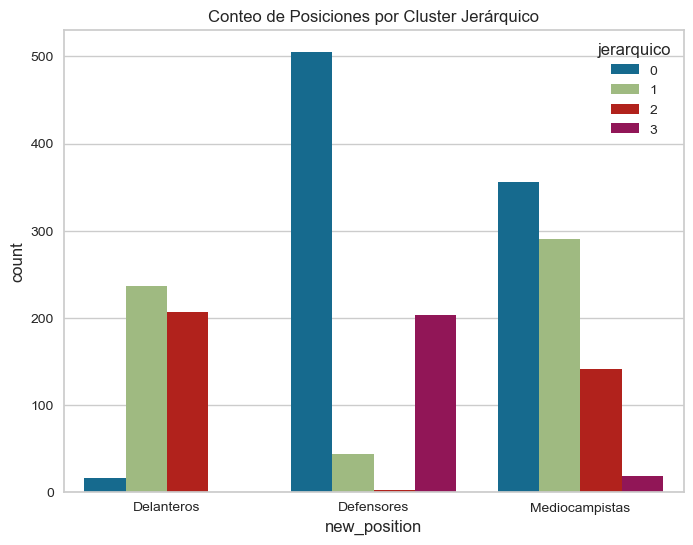

In [56]:

fig = plt.figure(figsize=(8, 6))

sns.countplot(x='new_position', hue='jerarquico', data=df_clusters)

plt.title('Conteo de Posiciones por Cluster Jerárquico')

plt.show()

<Axes: xlabel='jerarquico', ylabel='new_position'>

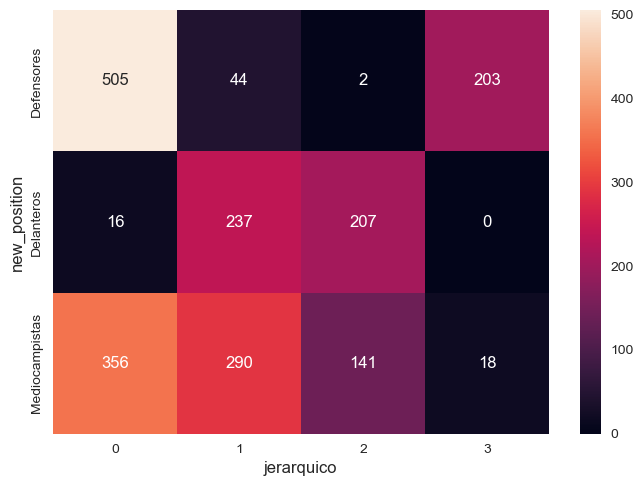

In [57]:
sns.heatmap(pd.crosstab(df_clusters['new_position'],df_clusters['jerarquico']),annot=True,fmt='g')

Se puede observar que como en KMEAN y MEAN SHIFT, hay una cierta concordancia en la división de clusters y las posiciones, si bien la posición de mediocampista se entrecruza con los clusters correspondientes a delanteros, y defensores. Esto puede deberse a que puede que haya mediocampistas con más habilidades de delantero, y mediocampistas con mas habilidades de defensor.

### Comparacion agrupamientos

Hacemos un silhouettte y dos skills 

El coeficiente de silueta promedio (Silhouette Score) es una medida útil para evaluar la calidad de los clústeres generados por un algoritmo de agrupamiento.

In [58]:
def coeficiente_silueta(df, clusters, metodo, habilidad_1, habilidad_2):
    # Obtener el número de clústeres únicos
    n_clusters_ = len(np.unique(clusters))

    # Calcular el coeficiente de silueta promedio
    coeficiente_promedio = silhouette_score(df, clusters)
    print('Método de Agrupamiento:', metodo)
    print("Para n_clusters =", n_clusters_,
          "El coeficiente de silueta promedio es:", coeficiente_promedio)

    # Calcular los valores de silueta para cada muestra
    valores_silueta = silhouette_samples(df, clusters)

    # Configurar la visualización
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 6)
    y_lower = 10

    # Visualizar cada clúster y sus valores de silueta
    for i in range(n_clusters_):
        valores_silueta_cluster = valores_silueta[clusters == i]
        print('Clúster ' + str(i) + ':', valores_silueta_cluster.shape[0])
        valores_silueta_cluster.sort()

        tamaño_clúster = valores_silueta_cluster.shape[0]
        y_upper = y_lower + tamaño_clúster

        color = cm.nipy_spectral(float(i) / n_clusters_)

        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, valores_silueta_cluster,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * tamaño_clúster, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Visualización de los datos.")
    ax1.axvline(x=coeficiente_promedio, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Visualizar las habilidades en el segundo gráfico
    sns.scatterplot(data=df, y=habilidad_1, x=habilidad_2, hue=clusters, palette='Dark2', ax=ax2)

    plt.show()

Método de Agrupamiento: kmeans
Para n_clusters = 4 El coeficiente de silueta promedio es: 0.2066413362866708
Clúster 0: 556
Clúster 1: 397
Clúster 2: 608
Clúster 3: 458


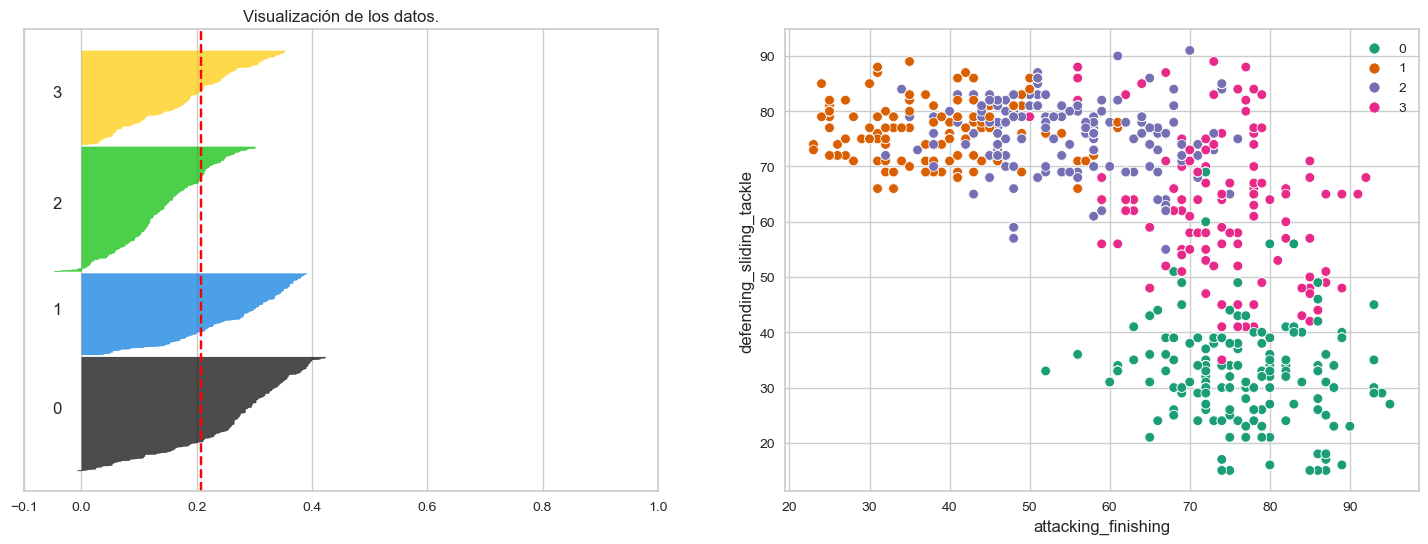

Método de Agrupamiento: MeanS
Para n_clusters = 3 El coeficiente de silueta promedio es: 0.24409262732704226
Clúster 0: 1081
Clúster 1: 902
Clúster 2: 36


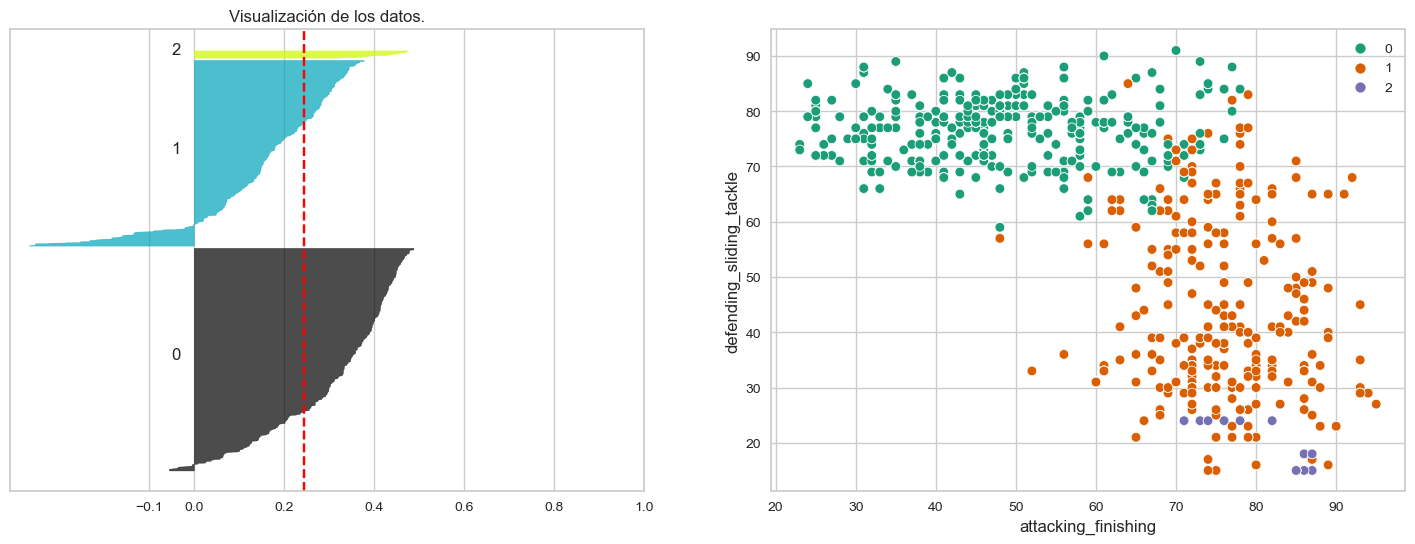

Método de Agrupamiento: jerarquico
Para n_clusters = 4 El coeficiente de silueta promedio es: 0.13502010979184234
Clúster 0: 877
Clúster 1: 571
Clúster 2: 350
Clúster 3: 221


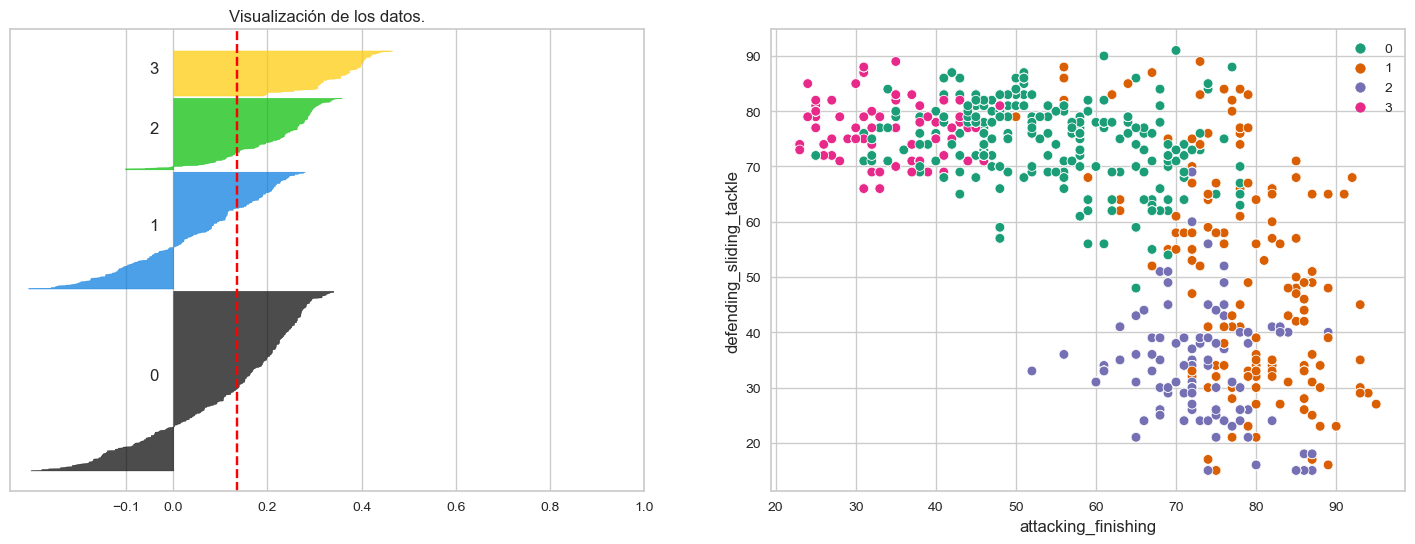

In [62]:
for i in ['kmeans','MeanS','jerarquico']:  
    coeficiente_silueta(df_n,df_clusters[i].values,i,'defending_sliding_tackle','attacking_finishing')


Análisis:

Coeficiente de Silueta Promedio: El coeficiente de silueta promedio se utiliza para medir la calidad de los clústeres. Cuanto más cercano a 1 esté este valor, mejor será la calidad de los clústeres en términos de separación y cohesión. En este sentido, "Mean Shift" tiene el valor más alto (0.2441), seguido de cerca por "K-Means" (0.2066), mientras que el "Agrupamiento Jerárquico" tiene un coeficiente de silueta promedio más bajo (0.1350).

Número de Puntos en los Clústeres: Es importante considerar la distribución de puntos en los clústeres. "K-Means" y "Agrupamiento Jerárquico" tienen números de puntos más equilibrados en cada clúster, mientras que "Mean Shift" tiene una gran concentración de puntos en los primeros dos clústeres y un tercer clúster con muy pocos puntos.

La elección del mejor método de agrupamiento depende en gran medida de la interpretación de los clústeres y de los objetivos específicos del análisis. Un coeficiente de silueta más alto indica una mejor calidad de los clústeres en términos de separación, pero también es importante considerar la coherencia de los clústeres y cómo se alinean con el conocimiento del dominio. Además de la calidad de los clústeres, la escalabilidad también es un factor a considerar. "Mean Shift" puede ser menos escalable en comparación con "K-Means" y "Agrupamiento Jerárquico" para grandes conjuntos de datos.

En resumen, si se prioriza la calidad de los clústeres y el coeficiente de silueta promedio, "Mean Shift" parece ser la mejor opción en este caso. Sin embargo, la elección del método debe basarse en una combinación de factores, incluida la interpretación de los clústeres y la escalabilidad. Además, puede ser útil realizar análisis adicionales y pruebas para validar los resultados del agrupamiento.






## 5- Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.

### Proyeccion utilizando t-SNE

Proyectamos las skills del espacio de 28 dimensiones (sin incluir arqueros) a 2 dimensiones, teniendo en cuenta solo jugadores titulares en equipos, es decir sin suplentes y reservas.

In [63]:
df_position.shape, df_n.shape

((2019, 111), (2019, 28))

In [64]:
time_start = time.time()

tsne = manifold.TSNE(n_components=2, verbose=1, perplexity=30)
X_tsne = tsne.fit_transform(df_n)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2019 samples in 0.000s...
[t-SNE] Computed neighbors for 2019 samples in 0.072s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2019
[t-SNE] Computed conditional probabilities for sample 2000 / 2019
[t-SNE] Computed conditional probabilities for sample 2019 / 2019
[t-SNE] Mean sigma: 23.206520
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.989403
[t-SNE] KL divergence after 1000 iterations: 0.184256
t-SNE done! Time elapsed: 7.112003564834595 seconds


In [65]:
X_tsne.shape

(2019, 2)

In [66]:
graf1 = go.Scatter(x=X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                           text=df_position.loc[:,'new_position'],
                           marker=dict(
                                size=5)
                           )

layout_9 = go.Layout(title="Visualización de la base en el espacio tsne",titlefont=dict(size=20),
                xaxis=dict(title='componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=800,height=500)

fig9 = go.Figure(data=graf1,layout=layout_9)

pyo.plot(fig9, filename='cluster_plot.html')

'cluster_plot.html'

In [67]:
Delantero= df_position["new_position"] == 'Delanteros'
Defensor= df_position["new_position"] == 'Defensores'
Mediocampista= df_position["new_position"] == 'Mediocampistas'
Arquero= df_position["new_position"] == 'Arqueros'


bool_crack=df_position["overall"] > 85

palette=['navy','red','#A2D5F2','orange','green','pink']  
data=[]

delan =go.Scatter(x=X_tsne[Delantero,0], y=X_tsne[Delantero,1],name='Delantero',
                      text=df_position.loc[Delantero],
                      opacity=0.9,marker=dict(color=palette[0],size=5),mode='markers')

m =go.Scatter(x=X_tsne[Mediocampista,0], y=X_tsne[Mediocampista,1],name='Mediocampista',
                      text=df_position.loc[Mediocampista],
                      opacity=0.6,marker=dict(color=palette[1],size=5),mode='markers')

defen =go.Scatter(x=X_tsne[Defensor,0], y=X_tsne[Defensor,1],name='Defensor',
                      text=df_position.loc[Defensor],
                      opacity=0.7,marker=dict(color=palette[2],size=5),mode='markers')

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Top player',
                      text=df_position.loc[bool_crack,'short_name'],textfont=dict(family='sans serif',color='black',size=16),
                      opacity=0.9,mode='text')

layout_10 = go.Layout(title="t-SNE - Fifa Players",titlefont=dict(size=20),
                autosize=False, width=1050,height=750)

data=[delan,m,defen,crack]

fig10 = go.Figure(data=data, layout=layout_10)
pyo.plot(fig10, filename='cluster_plot.html')

'cluster_plot.html'

El agrupamiento visual, en este espacio, de los jugadores no es tan evidente pues los clusters no son disconexos. Las posiciones no explican tan claramente los clusters encontrados. Una explicación posible puede ser porque hay jugadoras ambivalentes que unen los espacios entre defensa, mediocampo y ataque.


#### Agrupamientos sobre t-SNE

Analizamos los metodos de agrupamiento sobre las proyecciones obtenidas sobre t-SNE.

In [68]:
# Dataframe con proyecciones tsne
df_tsne=df_position.copy()
df_tsne[['tsne_1','tsne_2']]= X_tsne[:,:]

In [69]:
df_tsne.shape,X_tsne.shape

((2019, 113), (2019, 2))

####  Kmeans

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

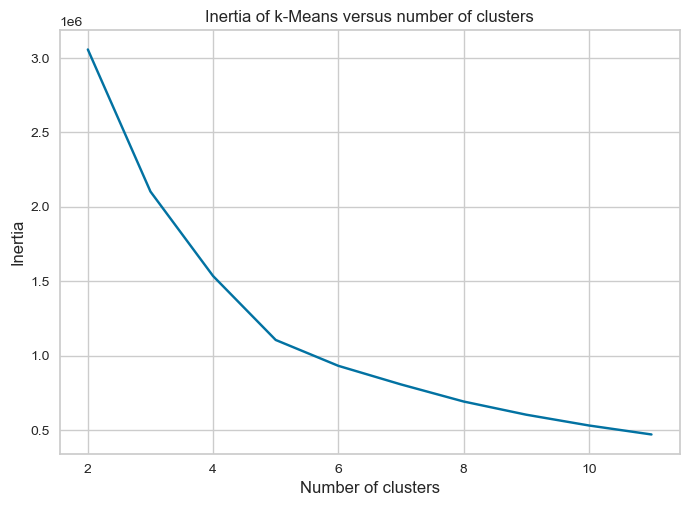

In [71]:
# Se emplea el método del codo para determinar el número de clusters más adecuado 

scores = [KMeans(n_clusters=i, n_init=10).fit(X_tsne).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [73]:
# Se determina el número más adecuado de clusters
n_clust = 5

km = KMeans(n_clusters=n_clust, random_state=1, n_init=10)
km.fit(X_tsne) 

clusters_tsne = km.labels_

In [74]:
kmean_clusters_1 = go.Scatter(x= X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                        text=df_tsne.loc[:,'new_position'],
                           marker=dict(
                                size=5,
                                color = clusters_tsne.astype(float), 
                                colorscale='cividis',
                                showscale=False))


layout_1 = go.Layout(title="Clustering K means - tSNE ",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='Componente 2'),
                autosize=False, width=800,height=650)

fig61 = go.Figure(data=kmean_clusters_1, layout=layout_1)
pyo.plot(fig61, filename='cluster_plot.html')

'cluster_plot.html'

##### Análisis de clusters

In [75]:
df_tsne['kmeans_tsne'] = km.labels_ 
df_tsne.kmeans_tsne.value_counts()

4    506
3    397
0    394
2    379
1    343
Name: kmeans_tsne, dtype: int64

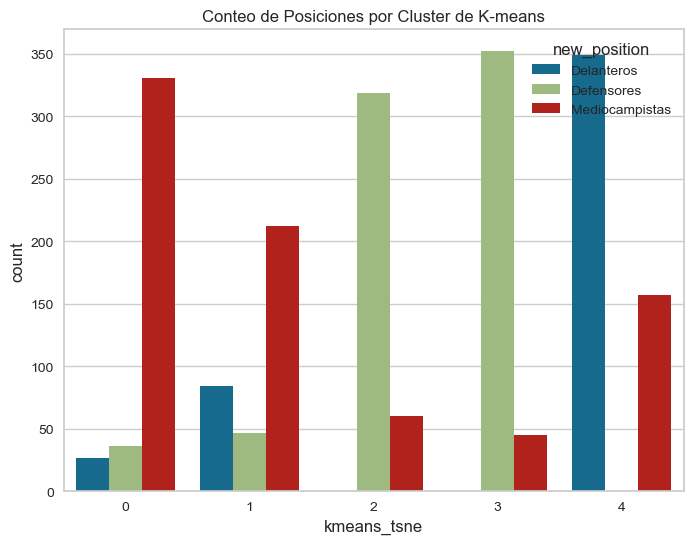

In [76]:

fig = plt.figure(figsize=(8, 6))

sns.countplot(x='kmeans_tsne', hue='new_position', data=df_tsne)

plt.title('Conteo de Posiciones por Cluster de K-means')

plt.show()

<Axes: xlabel='kmeans_tsne', ylabel='new_position'>

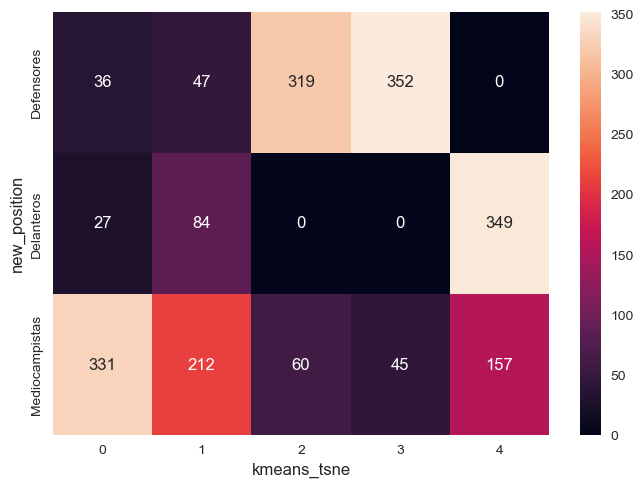

In [77]:
sns.heatmap(pd.crosstab(df_tsne['new_position'],df_tsne['kmeans_tsne']),annot=True,fmt='g')

No se observan grandes diferencias entre la relación observada entre los cluster encontrados y las posiciones, con KMEAN reduciendo o sin reducir la dimensionalidad, ya que se obtienen resultados similares.

#### MEAN SHIFT

In [78]:
# Estimacion bandwith
estimate_bandwidth(X_tsne)

51.3086043448111

La estimación de la banda o ancho de banda (bandwidth en inglés) es un paso importante en muchos algoritmos de aprendizaje automático que involucran la detección de estructuras en datos, como el agrupamiento. La "estimación de ancho de banda" se refiere a la determinación de qué tan ancha o estrecha debe ser una función kernel utilizada en métodos de estimación de densidad o en el cálculo de similitudes.

Con el bandwith estimado MeanShift encuentra solo 1 cluster, lo disminuimos para forzar clusters

In [79]:
ms = MeanShift(bandwidth=30) 

ms.fit(X_tsne)

clusters2_tsne = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2_tsne)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 6


In [80]:
MeanShift_clusters = go.Scatter(x= X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                        text=df_tsne.loc[:,'new_position'],
                           marker=dict(
                                size=5,
                                color = clusters2_tsne.astype(float), 
                                colorscale='cividis',
                                showscale=False)
                           )


layout_3= go.Layout(title="Mean Shift - tSNE",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='Componente 2'),
                autosize=False, width=1000,height=650)

fig62 = go.Figure(data=MeanShift_clusters, layout=layout_3)
pyo.plot(fig62, filename='cluster_plot.html')

'cluster_plot.html'

##### Análisis de clusters

In [81]:
df_tsne['MeanS_tSNE'] = ms.labels_
df_tsne.MeanS_tSNE.value_counts()

0    446
1    393
4    312
2    295
5    295
3    278
Name: MeanS_tSNE, dtype: int64

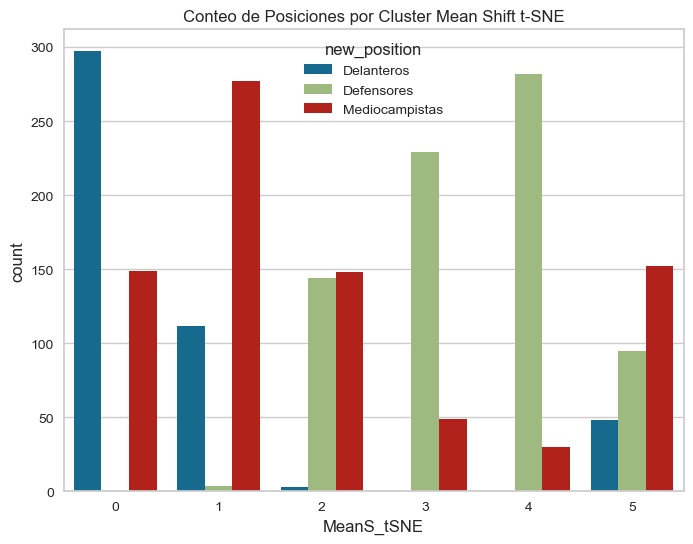

In [82]:

fig = plt.figure(figsize=(8, 6))

sns.countplot(x='MeanS_tSNE', hue='new_position', data=df_tsne)

plt.title('Conteo de Posiciones por Cluster Mean Shift t-SNE')

plt.show()

<Axes: xlabel='MeanS_tSNE', ylabel='new_position'>

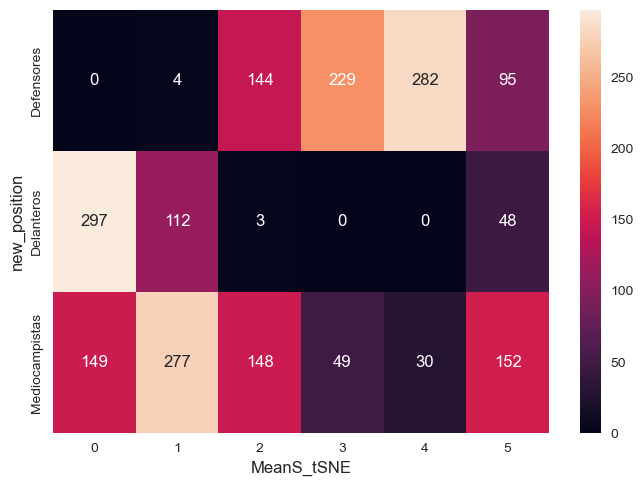

In [83]:
sns.heatmap(pd.crosstab(df_tsne['new_position'],df_tsne['MeanS_tSNE']),annot=True,fmt='g')

MeanShift encuentra en este caso dos agrupamientos, uno compuesto por defensores y mediocampistas, el otro por delanteros y mediocampistas. 

#### ALGORITMO JERÁRQUICO

In [85]:
jerarquico= cluster.AgglomerativeClustering(n_clusters=3, linkage='complete', metric='cityblock')

jerarquico.fit(X_tsne)

clusters3_tsne = jerarquico.labels_

In [86]:
jerarquico_clusters = go.Scatter(x= X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                        text=df_tsne.loc[:,'new_position'],
                           marker=dict(
                                size=5,
                                color = clusters3_tsne.astype(float), 
                                colorscale='inferno',
                                showscale=False))

layout_6 = go.Layout(title="Clustering jerárquico tSNE",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='Componente 2'),
                autosize=False, width=1000,height=650)

fig6 = go.Figure(data=jerarquico_clusters, layout=layout_6)
pyo.plot(fig6, filename='cluster_plot.html')

'cluster_plot.html'

##### Análisis de clusters

In [87]:
df_tsne['jerarquico_tSNE'] =jerarquico.labels_
df_tsne.jerarquico_tSNE.value_counts()

0    986
1    558
2    475
Name: jerarquico_tSNE, dtype: int64

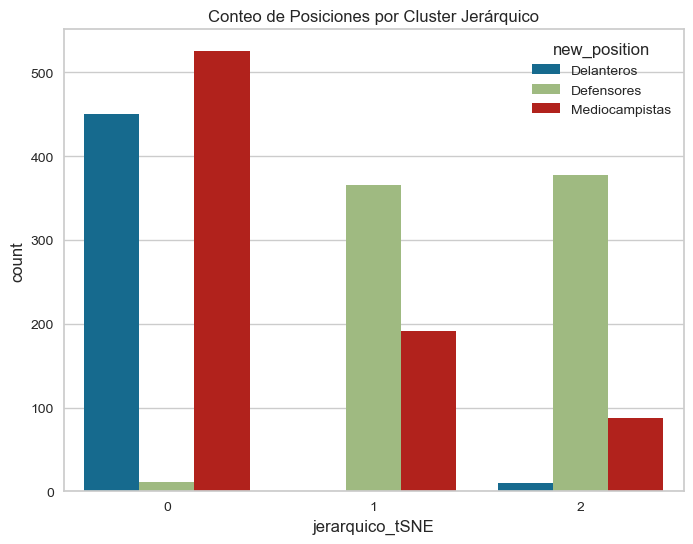

In [88]:
fig = plt.figure(figsize=(8, 6))


sns.countplot(x='jerarquico_tSNE', hue='new_position', data=df_tsne)

plt.title('Conteo de Posiciones por Cluster Jerárquico')

plt.show()

<Axes: xlabel='jerarquico_tSNE', ylabel='new_position'>

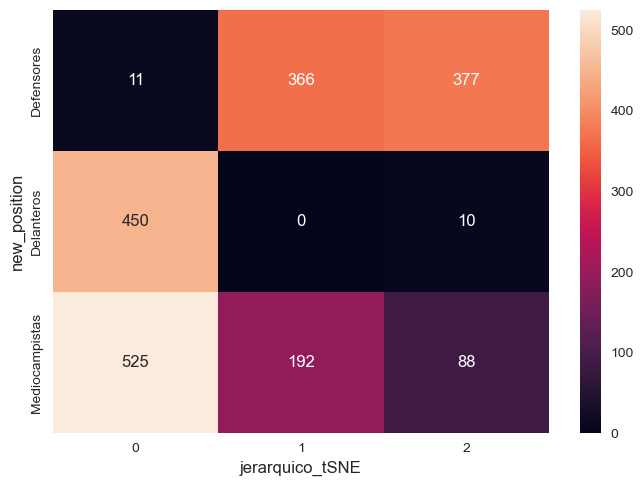

In [89]:
sns.heatmap(pd.crosstab(df_tsne['new_position'],df_tsne['jerarquico_tSNE']),annot=True,fmt='g')

#### Comparacion agrupamientos tSNE

Método de Agrupamiento: kmeans_tsne
Para n_clusters = 5 El coeficiente de silueta promedio es: 0.43654215
Clúster 0: 394
Clúster 1: 343
Clúster 2: 379
Clúster 3: 397
Clúster 4: 506


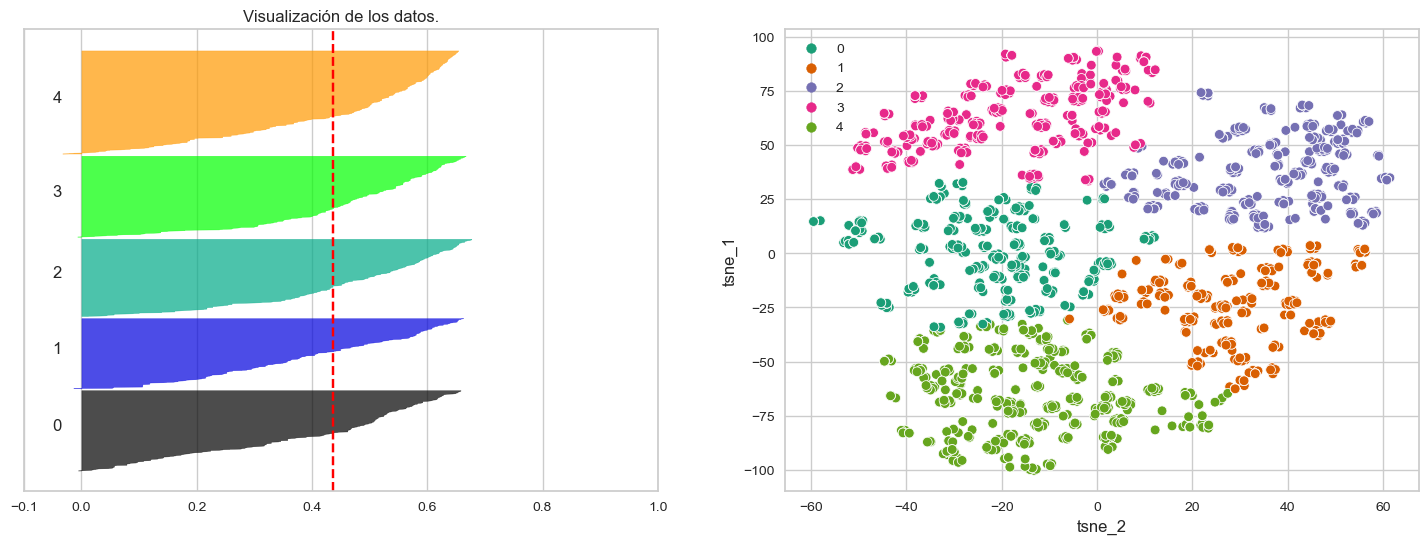

Método de Agrupamiento: MeanS_tSNE
Para n_clusters = 6 El coeficiente de silueta promedio es: 0.36458436
Clúster 0: 446
Clúster 1: 393
Clúster 2: 295
Clúster 3: 278
Clúster 4: 312
Clúster 5: 295


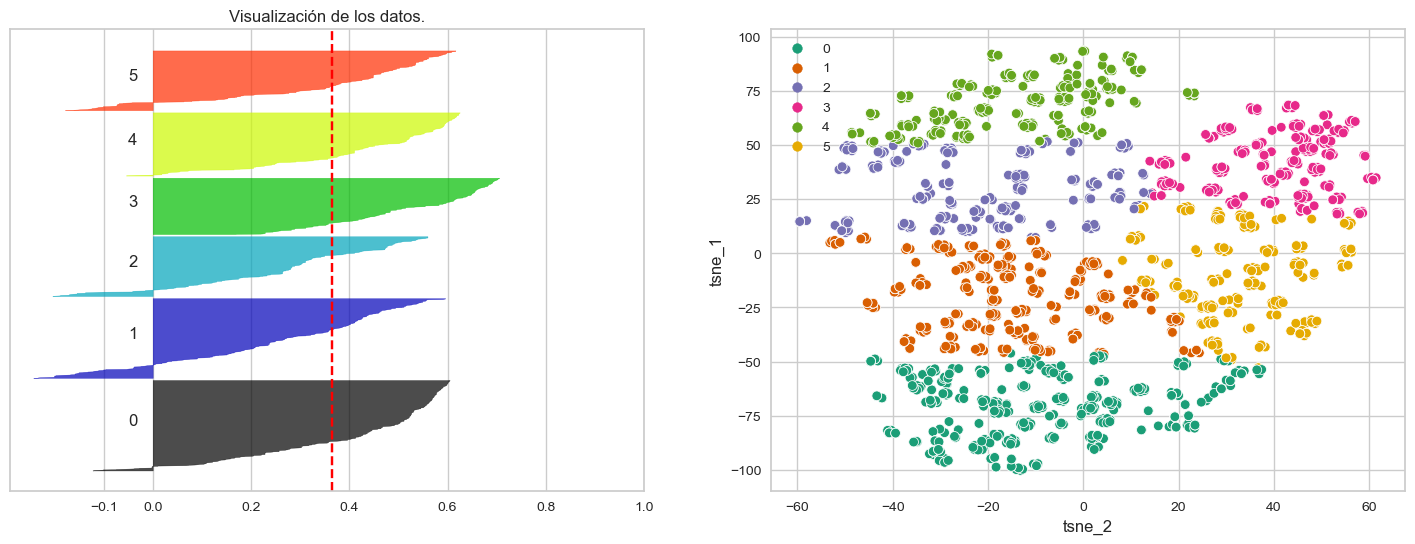

Método de Agrupamiento: jerarquico_tSNE
Para n_clusters = 3 El coeficiente de silueta promedio es: 0.41007003
Clúster 0: 986
Clúster 1: 558
Clúster 2: 475


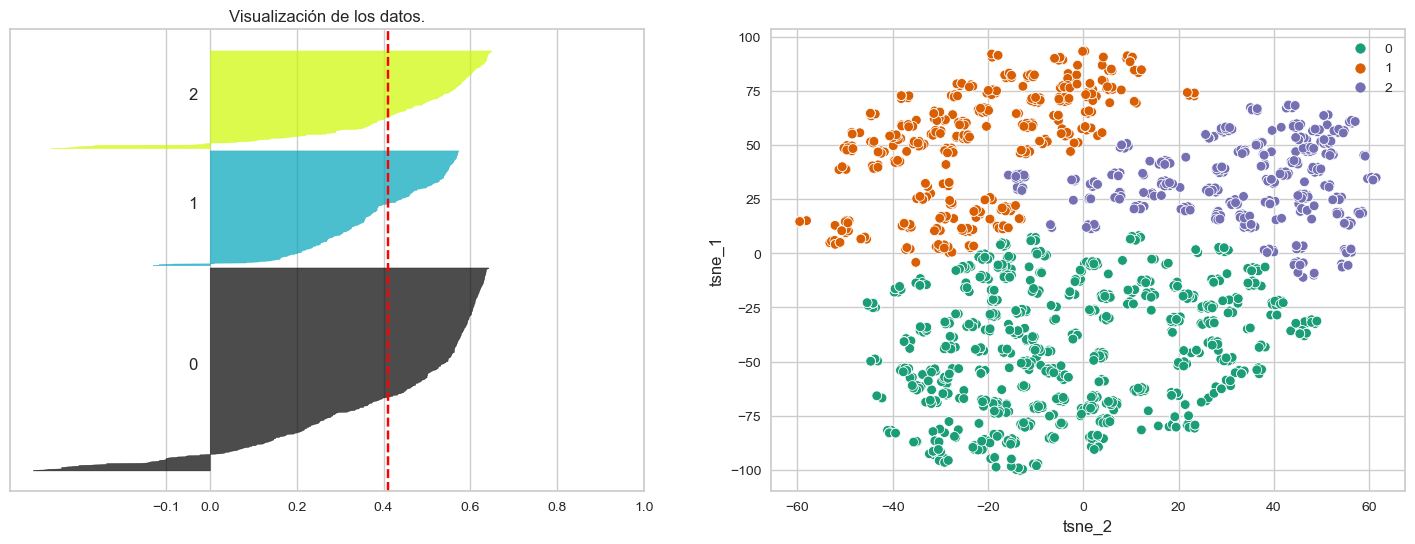

In [90]:
for i in ['kmeans_tsne', 'MeanS_tSNE', 'jerarquico_tSNE']:  
    coeficiente_silueta(df_tsne[['tsne_1', 'tsne_2']],df_tsne[i].values,i,'tsne_1','tsne_2')

Comparación y análisis:

En general, los resultados con t-SNE tienden a tener un Silhouette Score promedio más alto, lo que sugiere que los clústeres son más cohesivos y separados en comparación con los métodos anteriores. Por otro lado, los métodos previos obtuvieron un número de clústeres fijos (3, 4), mientras que con t-SNE, se exploraron diferentes números de clústeres (5, 6, 3) para encontrar el mejor ajuste. Esto demuestra la flexibilidad de t-SNE para adaptarse a diferentes estructuras de datos. Los tamaños de los clústeres varían en todos los métodos, lo que indica que los clústeres no son uniformes en tamaño. Sin embargo, en general, los tamaños de clústeres tienden a ser más uniformes en los resultados de t-SNE.

El t-SNE parece ser una técnica de reducción de dimensionalidad prometedora para la agrupación, ya que logra resultados con un Silhouette Score más alto y clústeres potencialmente más cohesivos en comparación con los métodos anteriores. 

### Principal Component Analysis (PCA)

In [91]:
# Frames a utilizar
df_pca= df_position.copy()
df_pca.shape , df_n.shape

((2019, 111), (2019, 28))

In [92]:
# Se escalan los datos previo a PCA

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

x_scaled = scaler.fit_transform(df_n)

# df_e = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df_i.index).round(3)
# df_i[column_names_to_normalize] = df_e

In [93]:
pca=decomposition.PCA(n_components=4)

pca.fit(x_scaled)

print('proporción de varianza por componente: ', pca.explained_variance_ratio_)

print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(x_scaled) 

print ('tamaño de los datos: ', X_projected.shape)


proporción de varianza por componente:  [0.42076055 0.15572022 0.10101349 0.06298356]
proporción de varianza por componente acumulada:  [0.42076055 0.57648077 0.67749425 0.74047782]
tamaño de los datos:  (2019, 4)


In [94]:
data=[]
pcs=pca.components_  

for i, (x,y) in enumerate(zip(pcs[0,:],pcs[1,:])):
    graph=go.Scatter(x=[0,x],y=[0,y],text=df_n.columns[i],
                     mode='lines+markers+text',textposition='middle right',
                     textfont=dict(family='sans serif',size=10))
    data.append(graph)
    

layout_11 = go.Layout(title="ACP - Fifa Skills",titlefont=dict(size=20),
            xaxis=dict(title='Componente 1'),
            yaxis=dict(title='Componente 2'),
            autosize=False, width=750,height=500,
            showlegend=False)

fig11 = go.Figure(data=data, layout=layout_11)
pyo.plot(fig11, filename='cluster_plot.html')

'cluster_plot.html'

En la visualizacion observamos cuales son las contribuciones de los atributos a las dos primeras componentes obtenidas con PCA.

<Axes: >

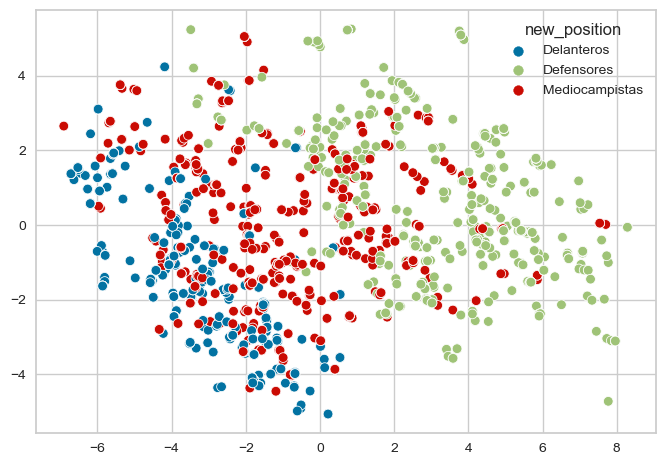

In [95]:
sns.scatterplot(x=X_projected[:,0],y=X_projected[:,1],hue=df_pca['new_position'])

### Agrupamientos sobre PCA

####  Kmeans

In [96]:
X_projected.shape

(2019, 4)

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

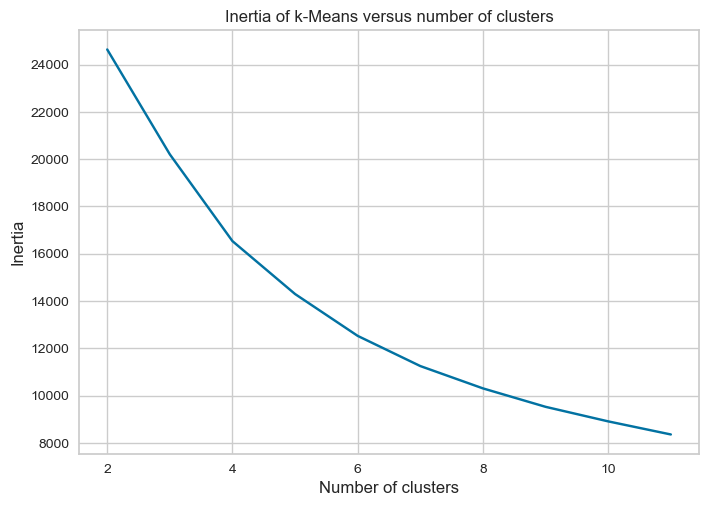

In [97]:
# Se emplea el método del codo para determinar el número de clusters más adecuado 

scores = [KMeans(n_clusters=i, n_init=10).fit(X_projected).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [98]:
# Se determina el número más adecuado de clusters
n_clust = 4

km = KMeans(n_clusters=n_clust, random_state=1, n_init=10)
km.fit(X_projected) 

clusters_pca = km.labels_

In [99]:
kmean_clusters_1 = go.Scatter(x= X_projected[:,0], y=X_projected[:,1],
                           mode='markers',
                        text=df_pca.loc[:,'new_position'],
                           marker=dict(
                                size=5,
                                color = clusters_pca.astype(float), 
                                colorscale='cividis',
                                showscale=False))


layout_1 = go.Layout(title="Clustering K means - PCA ",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='Componente 2'),
                autosize=False, width=800,height=650)

fig71 = go.Figure(data=kmean_clusters_1, layout=layout_1)
pyo.plot(fig71, filename='cluster_plot.html')

'cluster_plot.html'

##### Análisis de clusters

In [100]:
df_pca['kmeans_pca'] = km.labels_ 
df_pca.kmeans_pca.value_counts()

3    640
0    496
2    461
1    422
Name: kmeans_pca, dtype: int64

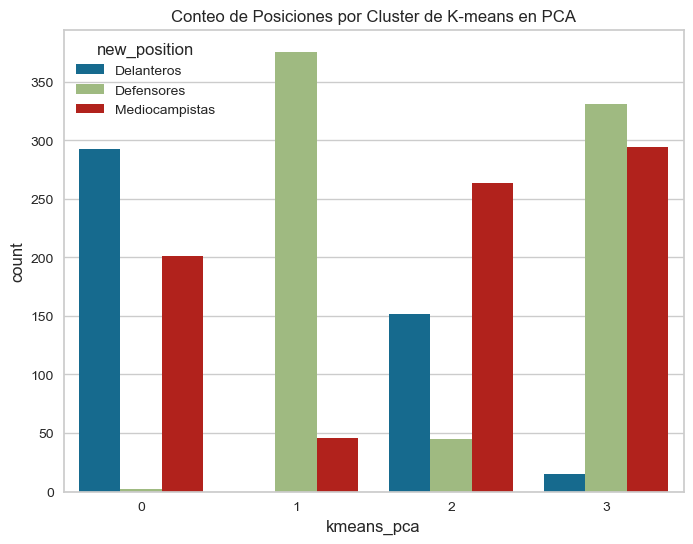

In [101]:

fig = plt.figure(figsize=(8, 6))

# Utiliza sns.countplot para contar las ocurrencias de posiciones diferenciadas por clusters de K-means en PCA
sns.countplot(x='kmeans_pca', hue='new_position', data=df_pca)

plt.title('Conteo de Posiciones por Cluster de K-means en PCA')


plt.show()

<Axes: xlabel='kmeans_pca', ylabel='new_position'>

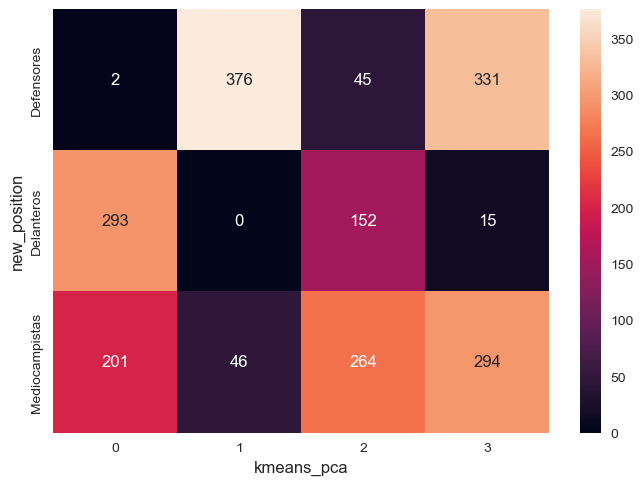

In [102]:
sns.heatmap(pd.crosstab(df_pca['new_position'],df_pca['kmeans_pca']),annot=True,fmt='g')

#### Mean Shift

In [103]:
# Estimacion bandwith
estimate_bandwidth(X_projected)

4.668558818852684

Con el bandwith estimado MeanShift encuentra solo 1 cluster, lo disminuimos para forzar clusters

In [104]:
ms = MeanShift(bandwidth=3.2) 

ms.fit(X_projected)

clusters2_pca = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2_pca)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 3


In [105]:
MeanShift_clusters = go.Scatter(x= X_projected[:,0], y=X_projected[:,1],
                           mode='markers',
                        text=df_pca.loc[:,'new_position'],
                           marker=dict(
                                size=5,
                                color = clusters2_pca.astype(float), 
                                colorscale='cividis',
                                showscale=False)
                           )


layout_3= go.Layout(title="Mean Shift - PCA",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='Componente 2'),
                autosize=False, width=1000,height=650)

fig72 = go.Figure(data=MeanShift_clusters, layout=layout_3)
pyo.plot(fig72, filename='cluster_plot.html')

'cluster_plot.html'

##### Análisis de clusters

In [106]:
df_pca['MeanS_pca'] = ms.labels_
df_pca.MeanS_pca.value_counts()

1    911
0    563
2    545
Name: MeanS_pca, dtype: int64

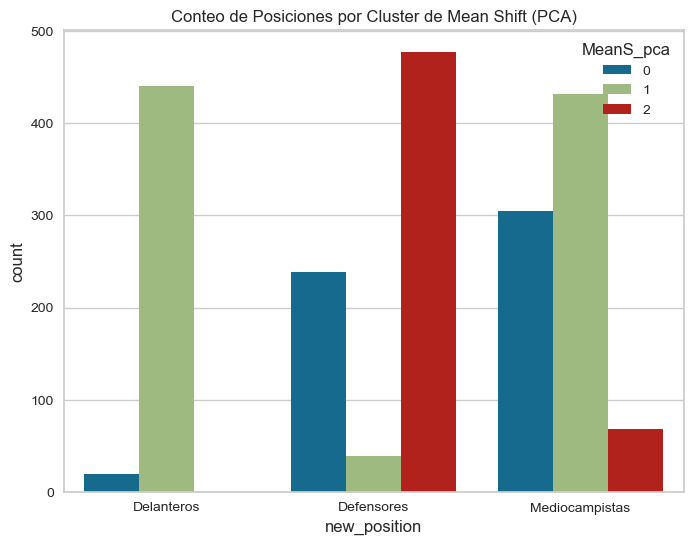

In [107]:
fig = plt.figure(figsize=(8, 6))

sns.countplot(x='new_position', hue='MeanS_pca', data=df_pca)

plt.title('Conteo de Posiciones por Cluster de Mean Shift (PCA)')

plt.show()

<Axes: xlabel='MeanS_pca', ylabel='new_position'>

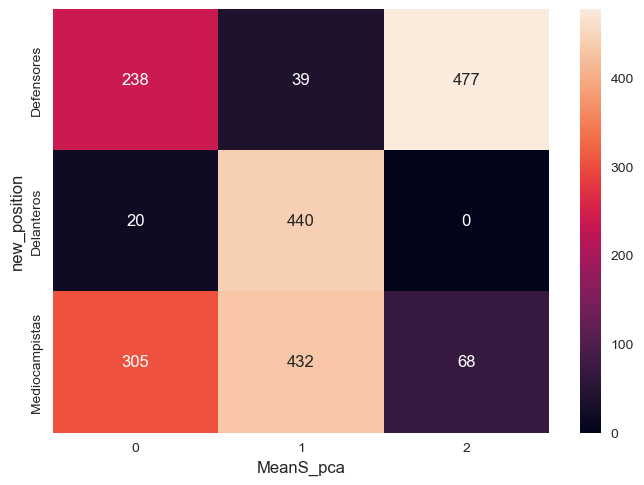

In [108]:
sns.heatmap(pd.crosstab(df_pca['new_position'],df_pca['MeanS_pca']),annot=True,fmt='g')

#### Algoritmo Jerarquico

In [110]:

jerarquico= cluster.AgglomerativeClustering(n_clusters=5, linkage='complete', metric='cityblock')

jerarquico.fit(X_projected)

clusters3_pca = jerarquico.labels_

In [111]:
jerarquico_clusters = go.Scatter(x= X_projected[:,0], y=X_projected[:,1],
                           mode='markers',
                        text=df_pca.loc[:,'new_position'],
                           marker=dict(
                                size=5,
                                color = clusters3_pca.astype(float), 
                                colorscale='inferno',
                                showscale=False))

layout_6 = go.Layout(title="Clustering jerárquico PCA",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='Componente 2'),
                autosize=False, width=1000,height=650)

fig6 = go.Figure(data=jerarquico_clusters, layout=layout_6)
pyo.plot(fig6, filename='cluster_plot.html')

'cluster_plot.html'

##### Análisis de clusters

In [112]:
df_pca['jerarquico_pca'] =jerarquico.labels_
df_pca.jerarquico_pca.value_counts()

0    529
2    439
1    437
3    401
4    213
Name: jerarquico_pca, dtype: int64

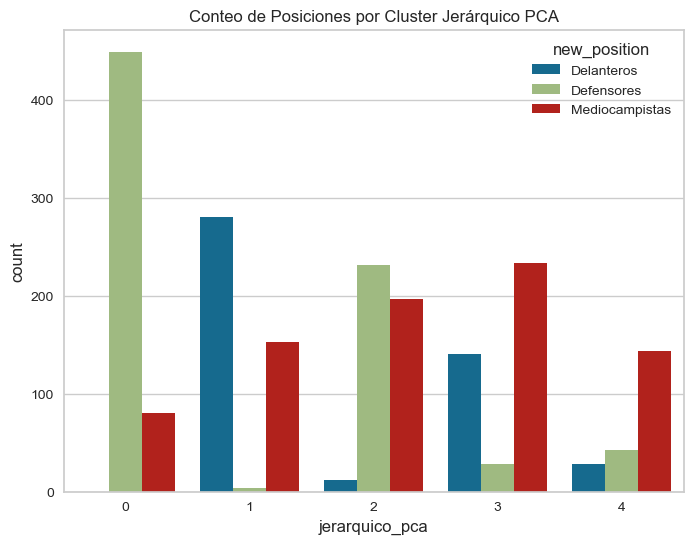

In [113]:
fig = plt.figure(figsize=(8, 6))

sns.countplot(x='jerarquico_pca', hue='new_position', data=df_pca)

plt.title('Conteo de Posiciones por Cluster Jerárquico PCA')

plt.show()

<Axes: xlabel='jerarquico_pca', ylabel='new_position'>

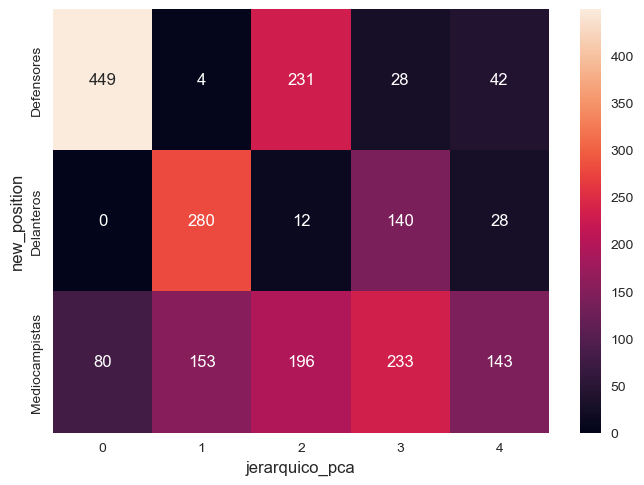

In [114]:
sns.heatmap(pd.crosstab(df_pca['new_position'],df_pca['jerarquico_pca']),annot=True,fmt='g')

#### Comparacion agrupamientos PCA

In [115]:
df_pca.head(2)

player_id                           player_url  fifa_version  fifa_update  \
0     227125       /player/227125/sam-kerr/230009            23            9   
1     227316  /player/227316/wendie-renard/230009            23            9   

  fifa_update_date short_name                  long_name player_positions  \
0       2023-01-13    S. Kerr          Samantha May Kerr               ST   
1       2023-01-13  W. Renard  Wéndèleine Thérèse Renard               CB   

   overall  potential  ...   lcb    cb   rcb    rb    gk  \
0       91         91  ...  58+3  58+3  58+3  61+3  20+3   
1       91         91  ...    91    91    91  82+3  21+3   

                                     player_face_url  new_position kmeans_pca  \
0  https://cdn.sofifa.net/players/227/125/23_120.png    Delanteros          2   
1  https://cdn.sofifa.net/players/227/316/23_120.png    Defensores          3   

   MeanS_pca  jerarquico_pca  
0          1               1  
1          0               2  

[2 rows x 114 columns]

Método de Agrupamiento: kmeans_pca
Para n_clusters = 4 El coeficiente de silueta promedio es: 0.2738765101982933
Clúster 0: 496
Clúster 1: 422
Clúster 2: 461
Clúster 3: 640


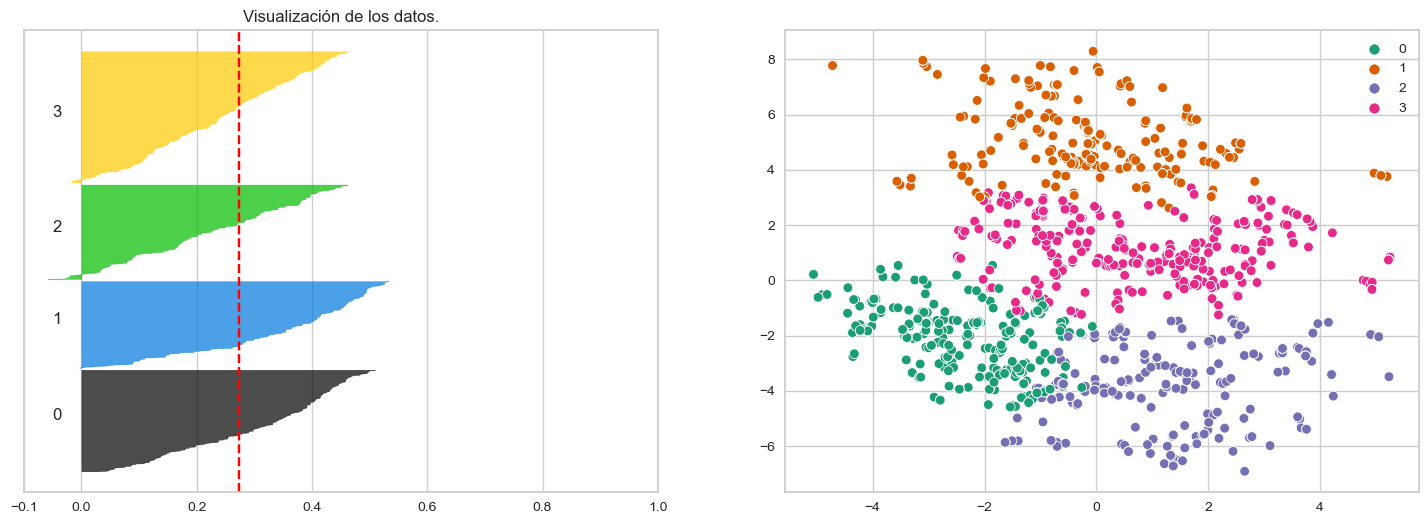

Método de Agrupamiento: MeanS_pca
Para n_clusters = 3 El coeficiente de silueta promedio es: 0.24215677484893394
Clúster 0: 563
Clúster 1: 911
Clúster 2: 545


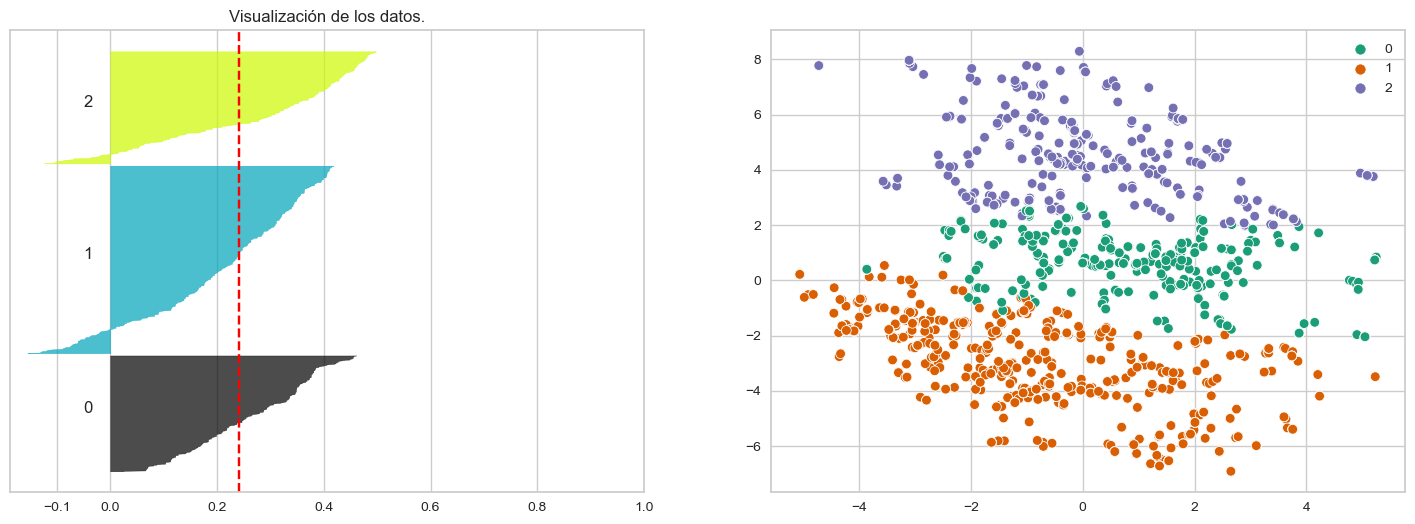

Método de Agrupamiento: jerarquico_pca
Para n_clusters = 5 El coeficiente de silueta promedio es: 0.2363724240447101
Clúster 0: 529
Clúster 1: 437
Clúster 2: 439
Clúster 3: 401
Clúster 4: 213


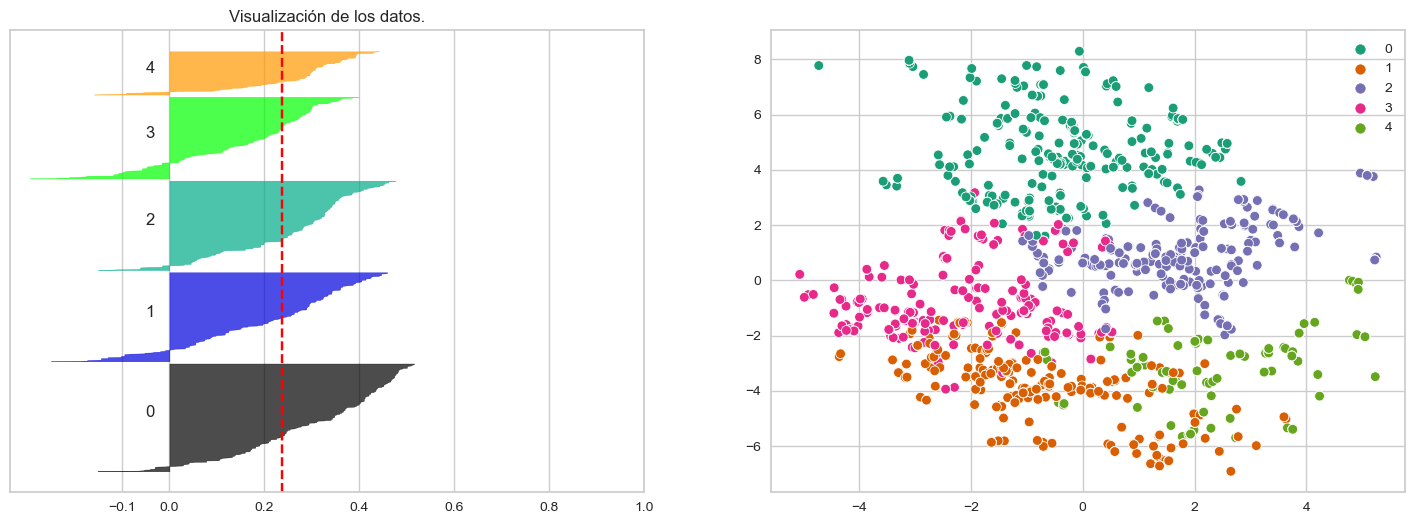

In [116]:
for i in ['kmeans_pca', 'MeanS_pca', 'jerarquico_pca']:  
      coeficiente_silueta(X_projected,df_pca[i].values,i,X_projected[:,0],X_projected[:,1])


En términos del Silhouette Score promedio, el método de K-Means PCA obtuvo el valor más alto (0.2739), seguido por Mean Shift PCA (0.2422) y Jerárquico PCA (0.2364). Esto indica que K-Means PCA tiene una mejor cohesión y separación entre clústeres en este conjunto de datos reducido por PCA. Los métodos de K-Means PCA y Mean Shift PCA eligieron 4 y 3 clústeres, respectivamente, mientras que Jerárquico PCA eligió 5. Esto puede reflejar diferentes estructuras detectadas en los datos después de la reducción de dimensionalidad. Los tamaños de los clústeres varían en todos los métodos, lo que sugiere que los clústeres no son uniformes en tamaño. Sin embargo, en todos los métodos, el clúster más grande tiene alrededor de 640 puntos de datos.

En general, los resultados sugieren que K-Means PCA es el método de agrupamiento más efectivo en este conjunto de datos después de la reducción de dimensionalidad utilizando PCA. 

## 6- Análisis cualitativo de los clusters encontrados. ¿Qué hay en cada cluster? ¿Son efectivamente equivalentes las jugadoras de un cluster, es decir, podrían cumplir el mismo rol en un equipo? Si se trata de clusters heterogéneos, ¿por qué razón pueden haber sido agrupadas las jugadoras del cluster? ¿Qué motiva las diferencias en tamaño?

Diferenciación de las Delanteras y Defensoras: Parece que los métodos de agrupamiento pueden distinguir con éxito las características que diferencian a las delanteras de las defensoras. Esto sugiere que las delanteras y las defensoras tienen atributos y habilidades significativamente diferentes en el conjunto de datos que estás utilizando.

Mediocampistas: La observación de que algunas características de las mediocampistas se asemejan más a las de las delanteras y otras a las de las defensoras es interesante. Esto podría deberse a la diversidad en las funciones de las mediocampistas en el fútbol. Algunos mediocampistas pueden tener un papel más ofensivo y, por lo tanto, compartan características con los delanteros, mientras que otros pueden ser más defensivos y, por lo tanto, compartir características con los defensores. Esto refleja la variabilidad en el juego de los mediocampistas.

En resumen, con los métodos de agrupamiento pueden ayudar a identificar diferencias y similitudes en las características de los jugadores en función de sus posiciones en el campo. Sin embargo, también destacan la complejidad y la versatilidad del juego, donde algunos jugadores pueden tener características que se superponen entre diferentes posiciones. Esta información puede ser valiosa para la toma de decisiones en el fútbol, como la selección de jugadores para ciertas posiciones o la estrategia de juego.

## 3- Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?

La base de datos se sometió a un proceso de estandarización utilizando la técnica de "Standard Scaler" antes de aplicar el Análisis de Componentes Principales (PCA). Sin embargo, no fue necesario realizar este proceso de estandarización para los métodos de agrupamiento, ya que los valores de las habilidades (skills) se encuentran dentro del rango de 0 a 100, lo que significa que ya estaban en una escala comparable y no requerían una normalización adicional.